In [120]:
import numpy as np
# Import libraries
'''Main'''
import numpy as np
import pandas as pd
import os, time
import pickle, gzip

'''Data Viz'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline
'''Data Prep and Model Evaluation'''
from sklearn import preprocessing as pp
from scipy.stats import pearsonr
from numpy.testing import assert_array_almost_equal
# PCA
from sklearn.decomposition import PCA
# Incremental PCA
from sklearn.decomposition import IncrementalPCA
# Sparse PCA
from sklearn.decomposition import SparsePCA
# Kernel PCA
from sklearn.decomposition import KernelPCA

# Singular Value Decomposition
from sklearn.decomposition import TruncatedSVD

# Gaussian Random Projection
from sklearn.random_projection import GaussianRandomProjection

# Sparse Random Projection
from sklearn.random_projection import SparseRandomProjection

# Isomap
from sklearn.manifold import Isomap

# Multidimensional Scaling
from sklearn.manifold import MDS

# Locally Linear Embedding (LLE)
from sklearn.manifold import LocallyLinearEmbedding

# t-SNE
from sklearn.manifold import TSNE

# Mini-batch dictionary learning
from sklearn.decomposition import MiniBatchDictionaryLearning

# Independent Component Analysis
from sklearn.decomposition import FastICA

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report


'''Algos'''
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import sys
# !{sys.executable} -m pip install lightgbm
import lightgbm as lgb


In [20]:
'''Downloading Data'''
# !{sys.executable} -m pip install keras
!{sys.executable} -m pip install tensorflow
import tensorflow as tf
from keras.datasets import mnist

  Using cached tensorflow-2.6.0-cp38-cp38-win_amd64.whl (423.2 MB)
  Using cached absl_py-0.13.0-py3-none-any.whl (132 kB)
  Using cached tensorflow_estimator-2.6.0-py2.py3-none-any.whl (462 kB)
  Using cached h5py-3.1.0-cp38-cp38-win_amd64.whl (2.7 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached grpcio-1.39.0-cp38-cp38-win_amd64.whl (3.2 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached clang-5.0-py3-none-any.whl
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorboard-2.6.0-py3-none-any.whl (5.6 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_auth_oauthlib-0.4.5-py2.py3-none-any.whl (18 kB)
  Using cached Markdown-3.3.4-py3-none

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [21]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

11501568/11490434 [==============================] - 1s 0us/step
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In the training set, we have 60000 images, each image a 28 by 28 array.

In [55]:
train_index = range(0,len(train_X))
print(train_index)

range(0, 60000)


In [49]:
print(train_X.reshape(-1, train_X.shape[0]).shape)

# def toReshape(df):
#     df.reshape((df.shape[0], df.shape[1]))
print(train_X.reshape((train_X.shape[0], train_X.shape[1]**2)).shape)

(784, 60000)
(60000, 784)


In [52]:
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1]**2))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1]**2))

In [51]:
n_components = 784
whiten = False
random_state = 2018
pca = PCA(n_components=n_components, whiten=whiten, \
          random_state=random_state)

In [57]:
train_X_PCA = pca.fit_transform(train_X)
train_X_PCA = pd.DataFrame(data = train_X_PCA, index = train_index)
train_X_PCA.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,123.932589,-312.674262,-24.514052,-555.757958,-27.296668,-232.476284,233.995733,159.799494,-363.515021,198.428077,...,0.0,0.0,0.0,0.0,-0.000000e+00,8.327381e-12,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00
1,1011.718376,-294.857038,596.339561,-460.766197,-827.275222,-181.950528,-45.020478,-104.969592,40.459118,150.968899,...,0.0,0.0,0.0,0.0,-2.439496e-13,1.056844e-13,-8.825350e-14,5.764501e-14,9.518163e-14,-2.162461e-14
2,-51.849608,392.173153,-188.509749,521.011347,-306.680729,-1.835346,-859.047199,368.591875,-114.546074,-178.508144,...,0.0,0.0,0.0,0.0,1.798613e-12,9.425806e-14,1.140075e-12,-7.571939e-13,1.418157e-13,1.135862e-13
3,-799.127037,-607.197217,273.651240,105.878237,-1.853226,699.654696,-473.713204,-67.321708,302.731266,11.111365,...,0.0,0.0,0.0,0.0,-1.227551e-12,6.193155e-14,3.810484e-13,1.221226e-12,-1.923945e-13,-4.380288e-14
4,-382.754942,730.542867,16.353747,-241.697519,98.161346,43.229727,-91.666599,-405.554885,225.501854,104.112265,...,0.0,0.0,0.0,0.0,-1.228652e-12,9.777182e-14,-4.395182e-13,5.854592e-13,1.781032e-14,1.219145e-13


In [58]:
print("Variance Explained by all 784 principal components: ", \
sum(pca.explained_variance_ratio_))

Variance Explained by all 784 principal components:  0.9999999999999998


This is great, since we merely transformed the data, not done PCA on it. That's why we could explain virtually 100% of the data.

In [60]:
importanceOfPrincipalComponents = \
pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

print('Variance Captured by First 10 Principal Components: ',
importanceOfPrincipalComponents.loc[:,0:9].sum(axis=1).values)
print('Variance Captured by First 20 Principal Components: ',
importanceOfPrincipalComponents.loc[:,0:19].sum(axis=1).values)
print('Variance Captured by First 50 Principal Components: ',
importanceOfPrincipalComponents.loc[:,0:49].sum(axis=1).values)
print('Variance Captured by First 100 Principal Components: ',
importanceOfPrincipalComponents.loc[:,0:99].sum(axis=1).values)
print('Variance Captured by First 200 Principal Components: ',
importanceOfPrincipalComponents.loc[:,0:199].sum(axis=1).values)
print('Variance Captured by First 300 Principal Components: ',
importanceOfPrincipalComponents.loc[:,0:299].sum(axis=1).values)

Variance Captured by First 10 Principal Components:  [0.4881498]
Variance Captured by First 20 Principal Components:  [0.6435809]
Variance Captured by First 50 Principal Components:  [0.82464686]
Variance Captured by First 100 Principal Components:  [0.91462857]
Variance Captured by First 200 Principal Components:  [0.96644735]
Variance Captured by First 300 Principal Components:  [0.98622875]


The first 10 components in total capture approximately 50% of the variance, 

the first one hundred components over 90%, 

and the first three hundred components
almost 99% of the variance; 

the information in the rest of the principal
components is of negligible value.

Basically, using just the first 200 principal componenets (newly combined params), we could capture over 96% of the variance/information.

In [72]:
type(pd.DataFrame(train_y))

pandas.core.frame.DataFrame

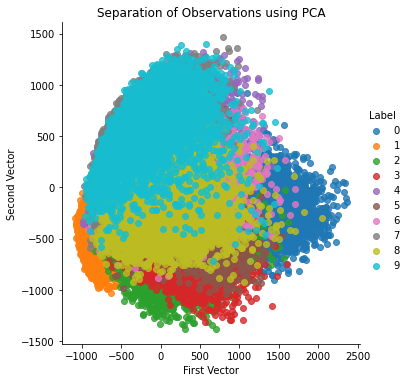

In [74]:
def scatterPlot(xDF, yDF, algoName):
    '''
    Plots the first 2 principal components (2 most important components),
    defining them by what digit they are from MNIST dataset
    '''
    tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label", \
    data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separation of Observations using "+algoName)
    
scatterPlot(train_X_PCA, pd.DataFrame(train_y), "PCA")


With just 2 points, PCA does great at separating points in space such that similar points are near each other. Images of same digits are closer to each other than images of other digits, and without using any labels either!

Suppose a supervised learning model graphed its 2 principal components. But these 2 principal components won't be well-separated :((

### Incremental PCA

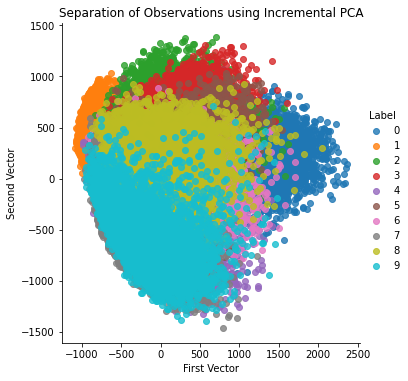

In [78]:
n_components = 784
batch_size = None
incrementalPCA = IncrementalPCA(n_components=n_components, \
batch_size=batch_size)
X_train_incrementalPCA = incrementalPCA.fit_transform(train_X)
X_train_incrementalPCA = \
pd.DataFrame(data=X_train_incrementalPCA, index=train_index)

# X_validation_incrementalPCA = incrementalPCA.transform(X_validation)
# X_validation_incrementalPCA = \
# pd.DataFrame(data=X_validation_incrementalPCA, index=validation_index)
scatterPlot(X_train_incrementalPCA, pd.DataFrame(train_y), "Incremental PCA")


### Sparse PCA

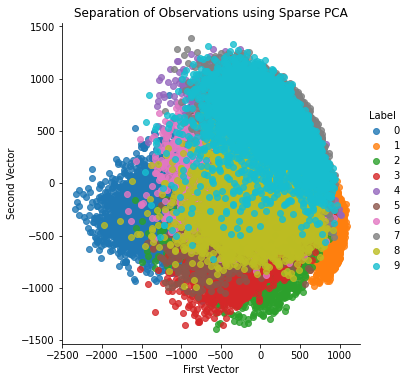

In [95]:
n_components = 100
alpha = 0.0001
random_state = 2018
n_jobs = -1
sparsePCA = SparsePCA(n_components=n_components, \
alpha = alpha, random_state=random_state, n_jobs=n_jobs)

sparsePCA.fit(train_X[:10000,:])

X_train_sparsePCA = sparsePCA.transform(train_X)
X_train_sparsePCA = pd.DataFrame(data=X_train_sparsePCA, index=train_index)
# X_validation_sparsePCA = sparsePCA.transform(X_validation)
# X_validation_sparsePCA = \
# pd.DataFrame(data=X_validation_sparsePCA, index=validation_index)
scatterPlot(X_train_sparsePCA, pd.DataFrame(train_y), "Sparse PCA")

### Kernel PCA

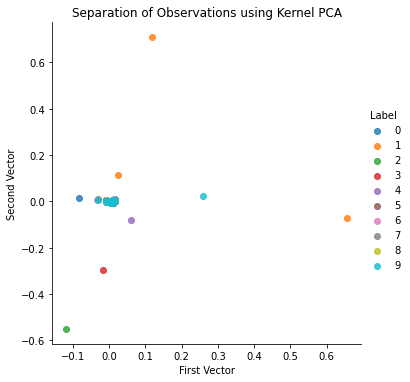

In [98]:
n_components = 100
kernel = 'rbf'
gamma = None
random_state = 2018
n_jobs = 1

kernelPCA = KernelPCA(n_components=n_components, kernel=kernel, \
gamma=gamma, n_jobs=n_jobs, random_state=random_state)
# kernelPCA.fit(train_X.loc[:10000,:])
kernelPCA.fit(train_X[:10000,:])
X_train_kernelPCA = kernelPCA.transform(train_X)
X_train_kernelPCA = pd.DataFrame(data=X_train_kernelPCA,index=train_index)
# X_validation_kernelPCA = kernelPCA.transform(X_validation)
# X_validation_kernelPCA = \
# pd.DataFrame(data=X_validation_kernelPCA, index=validation_index)

# Plot!
scatterPlot(X_train_kernelPCA, pd.DataFrame(train_y), "Kernel PCA")

Wow! Looks like one of the PCAs we have!

Or at least, it's supposed to. 

Anyways, moving on...

### Singular Value Decomposition

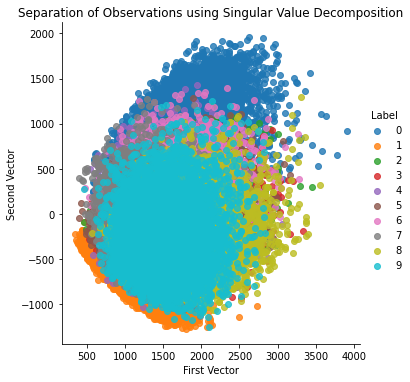

In [101]:
n_components = 200
algorithm = 'randomized'
n_iter = 5
random_state = 2018
svd = TruncatedSVD(n_components=n_components, algorithm=algorithm, \
n_iter=n_iter, random_state=random_state)
X_train_svd = svd.fit_transform(train_X)
X_train_svd = pd.DataFrame(data=X_train_svd, index=train_index)
# X_validation_svd = svd.transform(X_validation)
# X_validation_svd = pd.DataFrame(data=X_validation_svd, index=validation_index)

# Plot!
scatterPlot(X_train_svd, pd.DataFrame(train_y), "Singular Value Decomposition")

### Gaussian Random Projection

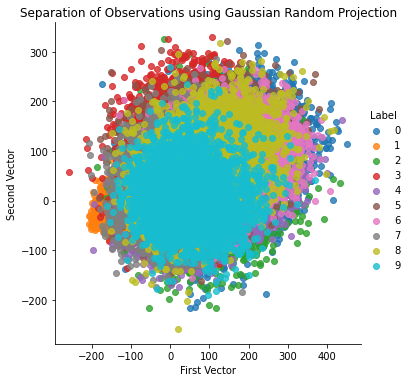

In [105]:
n_components = 'auto'
eps = 0.5
random_state = 2018
GRP = GaussianRandomProjection(n_components=n_components, eps=eps, \
random_state=random_state)
X_train_GRP = GRP.fit_transform(train_X)
X_train_GRP = pd.DataFrame(data=X_train_GRP, index=train_index)
# X_validation_GRP = GRP.transform(X_validation)
# X_validation_GRP = pd.DataFrame(data=X_validation_GRP, index=validation_index)

# Plot
scatterPlot(X_train_GRP, pd.DataFrame(train_y), "Gaussian Random Projection")

### Sparse Random Projection

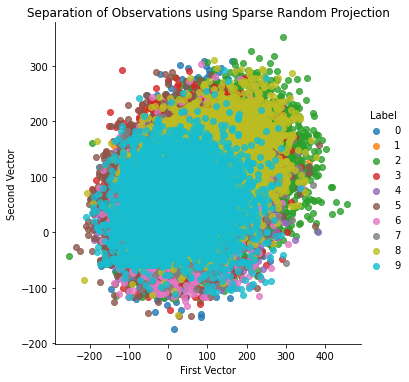

In [107]:
n_components = 'auto'
density = 'auto'
eps = 0.5
dense_output = False
random_state = 2018
SRP = SparseRandomProjection(n_components=n_components, \
density=density, eps=eps, dense_output=dense_output, \
random_state=random_state)
X_train_SRP = SRP.fit_transform(train_X)
X_train_SRP = pd.DataFrame(data=X_train_SRP, index=train_index)

# X_validation_SRP = SRP.transform(X_validation)
# X_validation_SRP = pd.DataFrame(data=X_validation_SRP, index=validation_index)
scatterPlot(X_train_SRP, pd.DataFrame(train_y), "Sparse Random Projection")


### Isomap

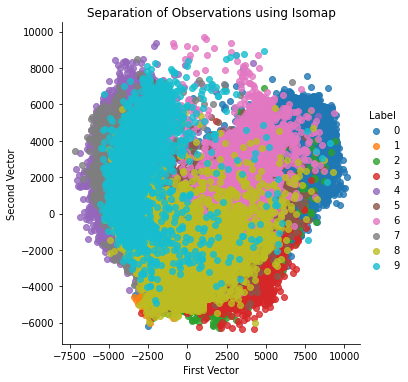

In [109]:
n_neighbors = 5
n_components = 10
n_jobs = 4
isomap = Isomap(n_neighbors=n_neighbors, \
n_components=n_components, n_jobs=n_jobs)
isomap.fit(train_X[0:5000,:])
X_train_isomap = isomap.transform(train_X)
X_train_isomap = pd.DataFrame(data=X_train_isomap, index=train_index)
# X_validation_isomap = isomap.transform(X_validation)
# X_validation_isomap = pd.DataFrame(data=X_validation_isomap, \
# index=validation_index)

# Plot
scatterPlot(X_train_isomap, pd.DataFrame(train_y), "Isomap")

### Multidimensional Scaling

In [111]:
n_components = 2
n_init = 12
max_iter = 1200
metric = True
n_jobs = 4
random_state = 2018
mds = MDS(n_components=n_components, n_init=n_init, max_iter=max_iter, \
metric=metric, n_jobs=n_jobs, random_state=random_state)
X_train_mds = mds.fit_transform(train_X[0:1000,:])
X_train_mds = pd.DataFrame(data=X_train_mds, index=train_index[0:1001])
scatterPlot(X_train_mds, pd.DataFrame(train_y), "Multidimensional Scaling")

ValueError: Shape of passed values is (1000, 2), indices imply (1001, 2)

### Locally Linear Embedding (LLE)

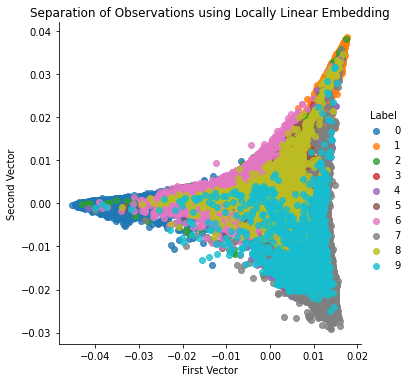

In [114]:
n_neighbors = 10
n_components = 2
method = 'modified'
n_jobs = 4
random_state = 2018
lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, \
n_components=n_components, method=method, \
random_state=random_state, n_jobs=n_jobs)
lle.fit(train_X[0:5000,:])
X_train_lle = lle.transform(train_X)
X_train_lle = pd.DataFrame(data=X_train_lle, index=train_index)
# X_validation_lle = lle.transform(X_validation)
# X_validation_lle = pd.DataFrame(data=X_validation_lle, index=validation_index)

scatterPlot(X_train_lle, pd.DataFrame(train_y), "Locally Linear Embedding")


### T-SNE (T-Distributed Stochastic Neighbor Embedding)

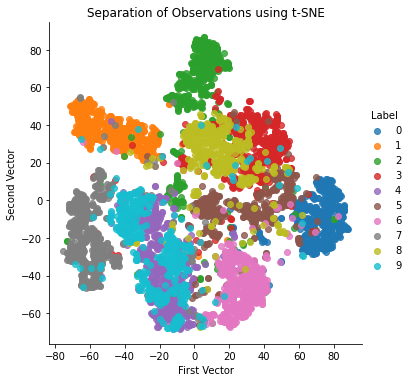

In [119]:
n_components = 2
learning_rate = 300
perplexity = 30
early_exaggeration = 12
init = 'random'
random_state = 2018
tSNE = TSNE(n_components=n_components, learning_rate=learning_rate, \
perplexity=perplexity, early_exaggeration=early_exaggeration, \
init=init, random_state=random_state)
X_train_tSNE = tSNE.fit_transform(train_X_PCA.loc[:5000,:9])
X_train_tSNE = pd.DataFrame(data=X_train_tSNE, index=train_index[:5001])
scatterPlot(X_train_tSNE, pd.DataFrame(train_y), "t-SNE")

t-SNE has a nonconvex cost function, which means that different initializations of the
algorithm will generate different results. There is no stable, constant, same solution.

### Mini-Batch Dictionary Learning

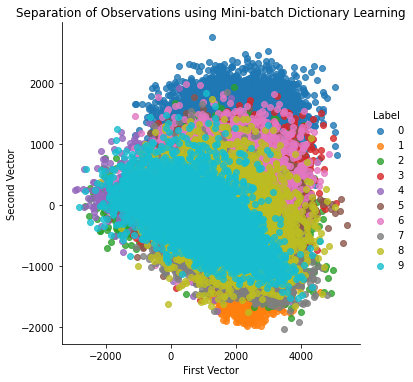

In [121]:
n_components = 50
alpha = 1
batch_size = 200
n_iter = 25
random_state = 2018
miniBatchDictLearning = MiniBatchDictionaryLearning( \
n_components=n_components, alpha=alpha, batch_size=batch_size, n_iter=n_iter, \
random_state=random_state)

miniBatchDictLearning.fit(train_X[:,:10000])
X_train_miniBatchDictLearning = miniBatchDictLearning.fit_transform(train_X)
X_train_miniBatchDictLearning = pd.DataFrame( \
data=X_train_miniBatchDictLearning, index=train_index)

# X_validation_miniBatchDictLearning = \
# miniBatchDictLearning.transform(X_validation)
# X_validation_miniBatchDictLearning = \
# pd.DataFrame(data=X_validation_miniBatchDictLearning, \
# index=validation_index)

scatterPlot(X_train_miniBatchDictLearning, pd.DataFrame(train_y), \
"Mini-batch Dictionary Learning")


### Independent Component Analysis (ICA)

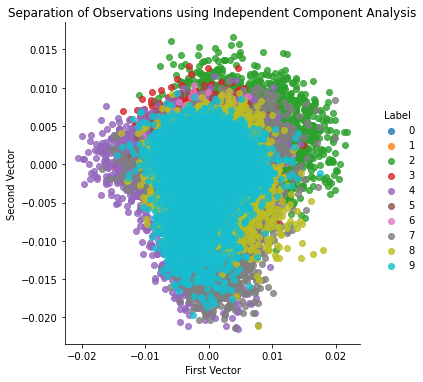

In [122]:
n_components = 25
algorithm = 'parallel'
whiten = True
max_iter = 100
random_state = 2018
fastICA = FastICA(n_components=n_components, algorithm=algorithm, \
whiten=whiten, max_iter=max_iter, random_state=random_state)
X_train_fastICA = fastICA.fit_transform(train_X)
X_train_fastICA = pd.DataFrame(data=X_train_fastICA, index=train_index)
# X_validation_fastICA = fastICA.transform(X_validation)
# X_validation_fastICA = pd.DataFrame(data=X_validation_fastICA, \
# index=validation_index)

scatterPlot(X_train_fastICA, pd.DataFrame(train_y), "Independent Component Analysis")
